In [2]:
import nba_api
import matplotlib.pyplot as plt
import pandas as pd

from nba_api.stats.endpoints import franchisehistory

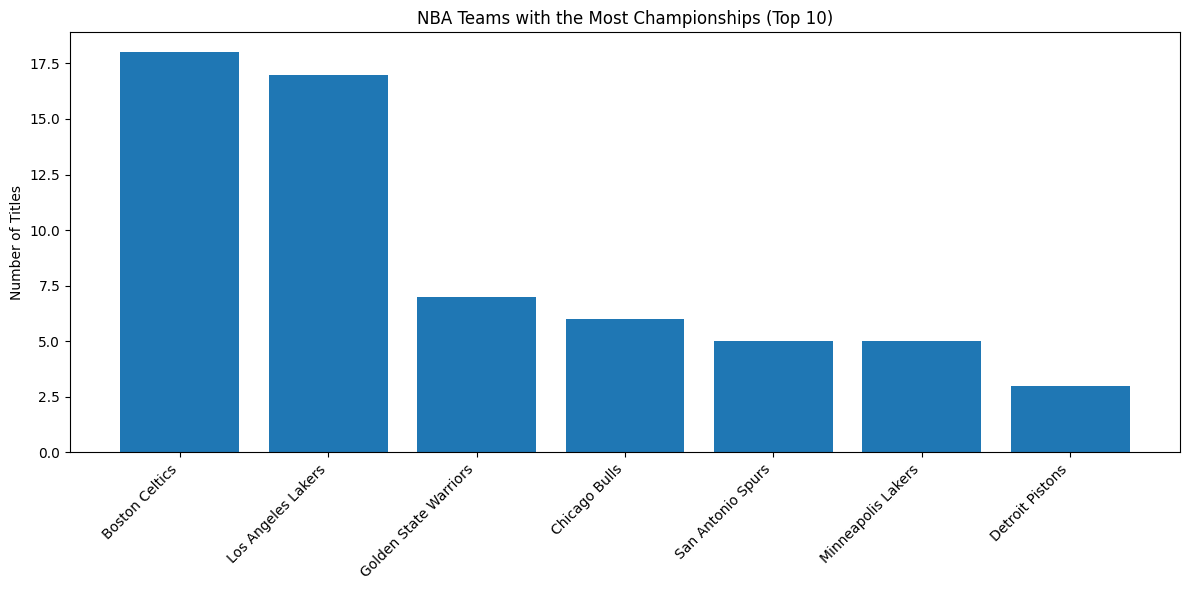

,TEAM_ID,FRANCHISE,Titles
0,1610612738,Boston Celtics,18
1,1610612747,Los Angeles Lakers,17
2,1610612747,Los Angeles Lakers,12
3,1610612744,Golden State Warriors,7
4,1610612741,Chicago Bulls,6
5,1610612744,Golden State Warriors,5
6,1610612759,San Antonio Spurs,5
7,1610612747,Minneapolis Lakers,5
8,1610612765,Detroit Pistons,3
9,1610612765,Detroit Pistons,3


In [3]:
#Graph 1
fr = franchisehistory.FranchiseHistory().get_data_frames()[0]

fr["FRANCHISE"] = fr["TEAM_CITY"] + " " + fr["TEAM_NAME"]
fr = fr[["TEAM_ID", "FRANCHISE", "LEAGUE_TITLES"]].rename(columns={"LEAGUE_TITLES": "Titles"})

top_n = 10
top = fr.sort_values("Titles", ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
bars = plt.bar(top["FRANCHISE"], top["Titles"])
plt.title(f"NBA Teams with the Most Championships (Top {top_n})")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()

top.reset_index(drop=True)

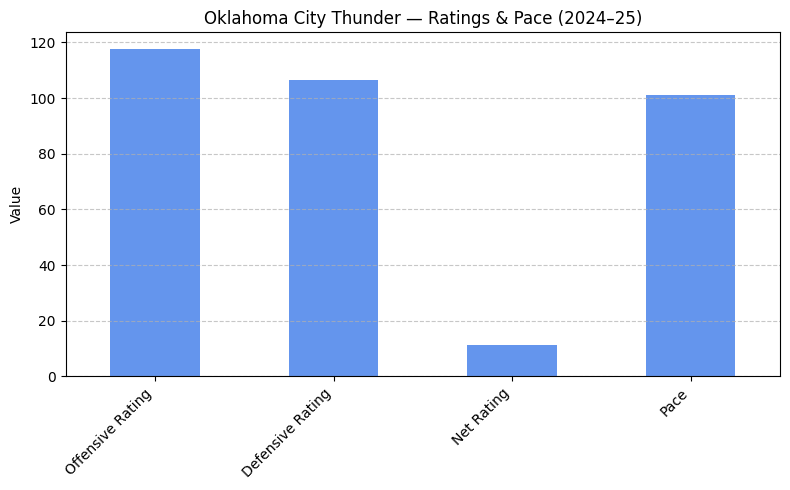

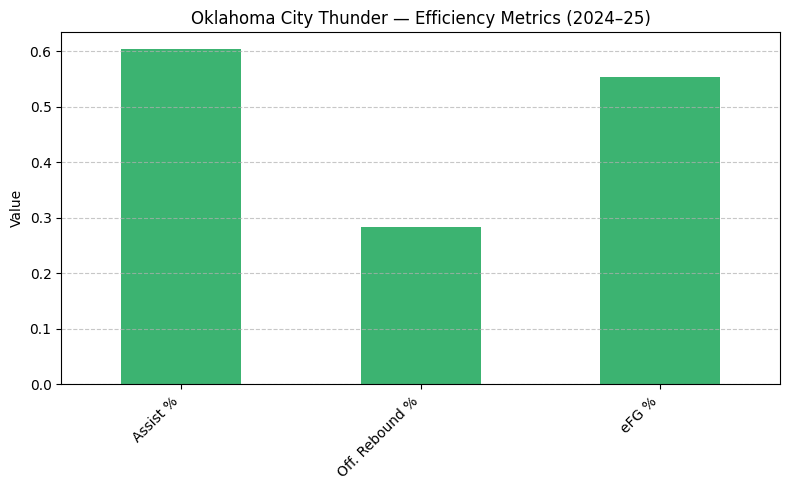

Offensive Rating     117.7
Defensive Rating     106.4
Net Rating            11.3
Pace                101.07
Assist %             0.604
Off. Rebound %       0.283
eFG %                0.554
Name: 46, dtype: object


In [4]:
#Graph 2 and 3

from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguedashteamstats

#Get OKC team ID
okc = [t for t in teams.get_teams() if t["full_name"] == "Oklahoma City Thunder"][0]
team_id = okc["id"]

#Fetch advanced per-game stats for 2024–25
stats = leaguedashteamstats.LeagueDashTeamStats(
    season="2024-25", measure_type_detailed_defense="Advanced", per_mode_detailed="PerGame"
).get_data_frames()[0]

#Filter for OKC
okc_stats = stats[stats["TEAM_ID"] == team_id].iloc[0]

#Select and rename columns
summary = okc_stats[["OFF_RATING", "DEF_RATING", "NET_RATING", "PACE", "AST_PCT", "OREB_PCT", "EFG_PCT"]]
summary = summary.rename({
    "OFF_RATING": "Offensive Rating",
    "DEF_RATING": "Defensive Rating",
    "NET_RATING": "Net Rating",
    "PACE": "Pace",
    "AST_PCT": "Assist %",
    "OREB_PCT": "Off. Rebound %",
    "EFG_PCT": "eFG %"
})

#Split into two groups
group1 = summary[["Offensive Rating", "Defensive Rating", "Net Rating", "Pace"]]
group2 = summary[["Assist %", "Off. Rebound %", "eFG %"]]

#Plot group 1
plt.figure(figsize=(8, 5))
group1.plot(kind="bar", color="cornflowerblue", legend=False)
plt.title("Oklahoma City Thunder — Ratings & Pace (2024–25)")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Plot group 2
plt.figure(figsize=(8, 5))
group2.plot(kind="bar", color="mediumseagreen", legend=False)
plt.title("Oklahoma City Thunder — Efficiency Metrics (2024–25)")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Print values
print(summary)


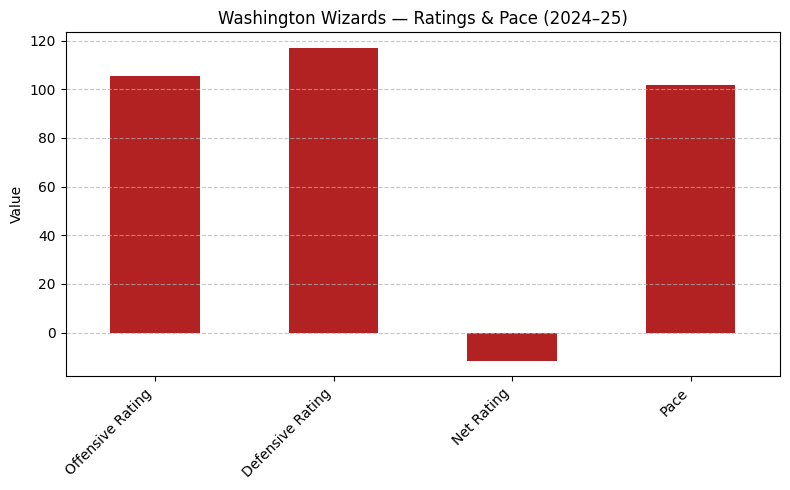

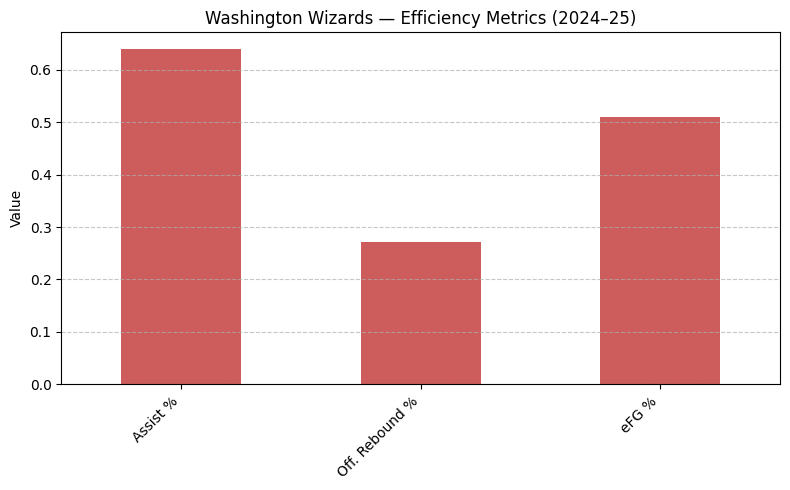

Offensive Rating     105.4
Defensive Rating     117.0
Net Rating           -11.6
Pace                101.96
Assist %             0.639
Off. Rebound %       0.272
eFG %                 0.51
Name: 72, dtype: object


In [5]:
#Graph 4 and 5
#Get Washington Wizards team ID
wash = [t for t in teams.get_teams() if t["full_name"] == "Washington Wizards"][0]
team_id = wash["id"]

#Fetch advanced per-game stats for 2024–25
stats = leaguedashteamstats.LeagueDashTeamStats(
    season="2024-25", measure_type_detailed_defense="Advanced", per_mode_detailed="PerGame"
).get_data_frames()[0]

#Filter for Washington
wash_stats = stats[stats["TEAM_ID"] == team_id].iloc[0]

#Select and rename columns
summary = wash_stats[["OFF_RATING", "DEF_RATING", "NET_RATING", "PACE", "AST_PCT", "OREB_PCT", "EFG_PCT"]]
summary = summary.rename({
    "OFF_RATING": "Offensive Rating",
    "DEF_RATING": "Defensive Rating",
    "NET_RATING": "Net Rating",
    "PACE": "Pace",
    "AST_PCT": "Assist %",
    "OREB_PCT": "Off. Rebound %",
    "EFG_PCT": "eFG %"
})

#Split into two groups
group1 = summary[["Offensive Rating", "Defensive Rating", "Net Rating", "Pace"]]
group2 = summary[["Assist %", "Off. Rebound %", "eFG %"]]

#Plot group 1 — Ratings & Pace
plt.figure(figsize=(8, 5))
group1.plot(kind="bar", color="firebrick", legend=False)
plt.title("Washington Wizards — Ratings & Pace (2024–25)")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Plot group 2 — Efficiency Metrics
plt.figure(figsize=(8, 5))
group2.plot(kind="bar", color="indianred", legend=False)
plt.title("Washington Wizards — Efficiency Metrics (2024–25)")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Display numerical stats
print(summary)

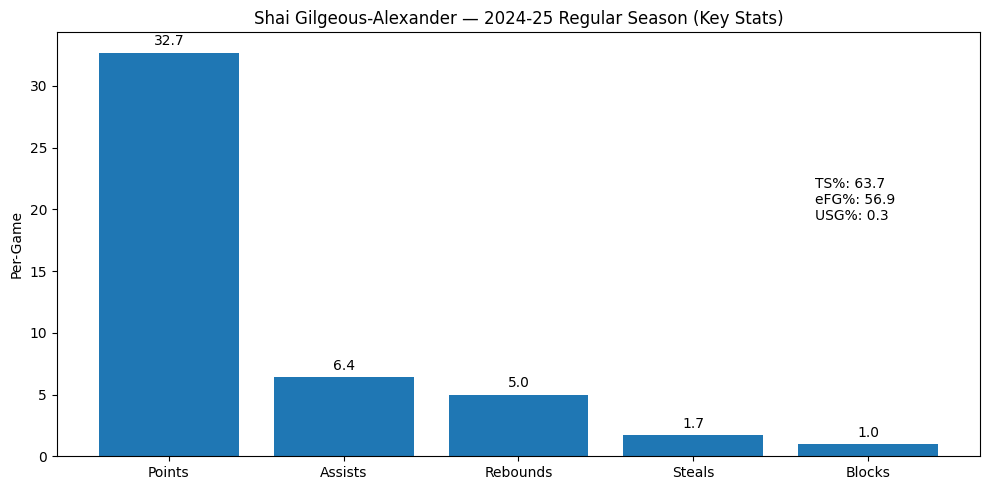

In [8]:
#Graph 6
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguedashplayerstats

PLAYER_NAME = "Shai Gilgeous-Alexander"
SEASON = "2024-25"
SEASON_TYPE = "Regular Season"
pid = players.find_players_by_full_name(PLAYER_NAME)[0]["id"]

#Fetch per-game box stats
pergame = leaguedashplayerstats.LeagueDashPlayerStats(
    season=SEASON,
    per_mode_detailed="PerGame",
    season_type_all_star=SEASON_TYPE,
    measure_type_detailed_defense="Base"
).get_data_frames()[0]

row_base = pergame[pergame["PLAYER_ID"] == pid].iloc[0]

#Fetch advanced data (efficiency/usage)
advanced = leaguedashplayerstats.LeagueDashPlayerStats(
    season=SEASON,
    per_mode_detailed="PerGame",
    season_type_all_star=SEASON_TYPE,
    measure_type_detailed_defense="Advanced"
).get_data_frames()[0]

row_adv = advanced[advanced["PLAYER_ID"] == pid].iloc[0]


core_stats = {
    "Points": float(row_base["PTS"]),
    "Assists": float(row_base["AST"]),
    "Rebounds": float(row_base["REB"]),
    "Steals": float(row_base["STL"]),
    "Blocks": float(row_base["BLK"]),
}

ts = float(row_adv.get("TS_PCT", float("nan"))) * 100
efg = float(row_adv.get("EFG_PCT", float("nan"))) * 100
usg = float(row_adv.get("USG_PCT", float("nan")))     

labels = list(core_stats.keys())
values = list(core_stats.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values)
plt.title(f"{PLAYER_NAME} — {SEASON} {SEASON_TYPE} (Key Stats)")
plt.ylabel("Per-Game")
plt.xticks(rotation=0)

for b in bars:
    v = b.get_height()
    plt.annotate(f"{v:.1f}", (b.get_x() + b.get_width()/2, v),
                 ha="center", va="bottom", textcoords="offset points", xytext=(0, 3))

#Add a text box with efficiency/usage
textbox = (
    f"TS%: {ts:.1f}\n"
    f"eFG%: {efg:.1f}\n"
    f"USG%: {usg:.1f}"
)
plt.gcf().text(0.82, 0.55, textbox)

plt.tight_layout()
plt.show()

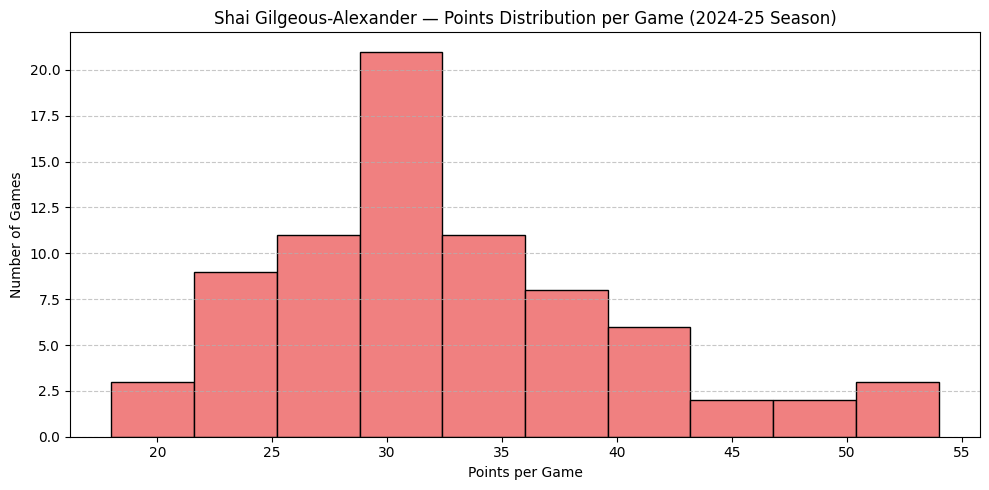

Shai Gilgeous-Alexander 2024-25 Regular Season
Games Played: 76
Average Points: 32.7
Median Points: 32.0
Max Points: 54.0
Min Points: 18.0


In [9]:
#Graph 7
from nba_api.stats.endpoints import playergamelog
PLAYER_NAME = "Shai Gilgeous-Alexander"
SEASON = "2024-25"

#  Find player ID 
player = players.find_players_by_full_name(PLAYER_NAME)[0]
player_id = player["id"]

#  Fetch game logs for that season 
gamelog = playergamelog.PlayerGameLog(
    player_id=player_id,
    season=SEASON,
    season_type_all_star="Regular Season"
)
df = gamelog.get_data_frames()[0]

#  Extract points per game 
points = df["PTS"].astype(float)

# Plot histogram 
plt.figure(figsize=(10,5))
plt.hist(points, bins=10, color="lightcoral", edgecolor="black")
plt.title(f"{PLAYER_NAME} — Points Distribution per Game ({SEASON} Season)")
plt.xlabel("Points per Game")
plt.ylabel("Number of Games")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

print(f"{PLAYER_NAME} {SEASON} Regular Season")
print(f"Games Played: {len(points)}")
print(f"Average Points: {points.mean():.1f}")
print(f"Median Points: {points.median():.1f}")
print(f"Max Points: {points.max()}")
print(f"Min Points: {points.min()}")

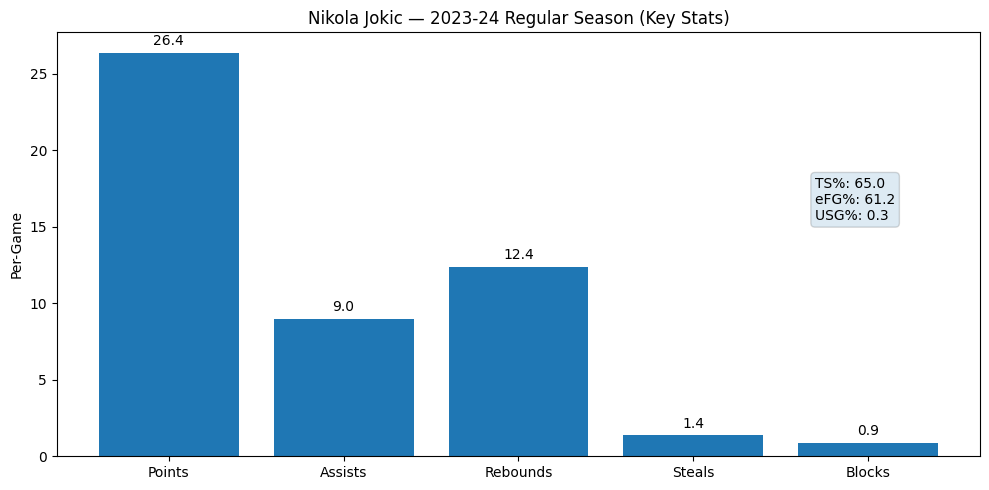

In [10]:
#Graph 8
PLAYER_NAME = "Nikola Jokic"
SEASON = "2023-24"
SEASON_TYPE = "Regular Season"

matches = players.find_players_by_full_name(PLAYER_NAME)
pid = matches[0]["id"]

#Fetch per-game box stats 
pergame = leaguedashplayerstats.LeagueDashPlayerStats(
    season=SEASON,
    per_mode_detailed="PerGame",
    season_type_all_star=SEASON_TYPE,
    measure_type_detailed_defense="Base"
).get_data_frames()[0]

row_base = pergame[pergame["PLAYER_ID"] == pid].iloc[0]

#Fetch advanced data (efficiency/usage) 
advanced = leaguedashplayerstats.LeagueDashPlayerStats(
    season=SEASON,
    per_mode_detailed="PerGame",
    season_type_all_star=SEASON_TYPE,
    measure_type_detailed_defense="Advanced"
).get_data_frames()[0]

row_adv = advanced[advanced["PLAYER_ID"] == pid].iloc[0]

core_stats = {
    "Points": float(row_base["PTS"]),
    "Assists": float(row_base["AST"]),
    "Rebounds": float(row_base["REB"]),
    "Steals": float(row_base["STL"]),
    "Blocks": float(row_base["BLK"]),
}

#Efficiency & usage to annotate
ts = float(row_adv.get("TS_PCT", float("nan"))) * 100
efg = float(row_adv.get("EFG_PCT", float("nan"))) * 100
usg = float(row_adv.get("USG_PCT", float("nan")))

labels = list(core_stats.keys())
values = list(core_stats.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values)
plt.title(f"Nikola Jokic — {SEASON} {SEASON_TYPE} (Key Stats)")
plt.ylabel("Per-Game")
plt.xticks(rotation=0)

#Annotate bar tops
for b in bars:
    v = b.get_height()
    plt.annotate(f"{v:.1f}", (b.get_x() + b.get_width()/2, v),
                 ha="center", va="bottom", textcoords="offset points", xytext=(0, 3))

#Add a text box with efficiency/usage
textbox = (
    f"TS%: {ts:.1f}\n"
    f"eFG%: {efg:.1f}\n"
    f"USG%: {usg:.1f}"
)
plt.gcf().text(0.82, 0.55, textbox, bbox=dict(boxstyle="round", alpha=0.15))

plt.tight_layout()
plt.show()

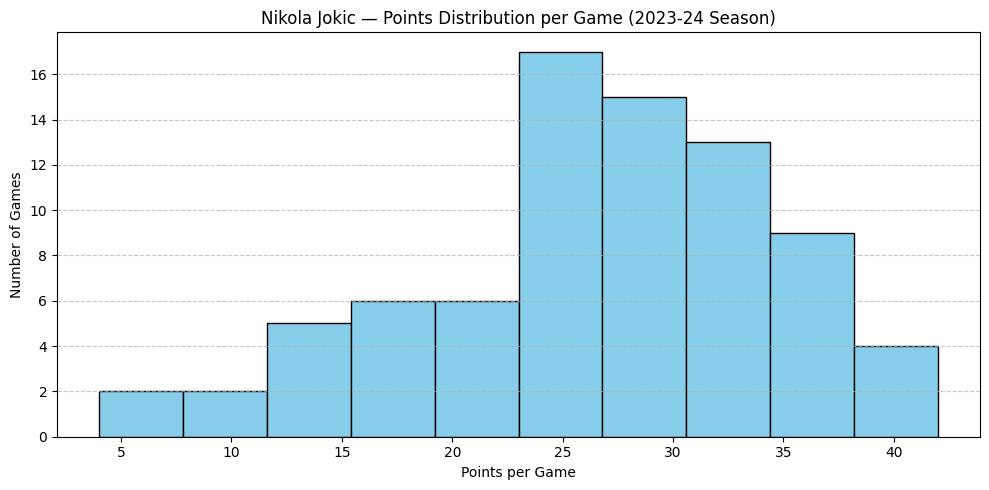

In [11]:
#Graph 9
PLAYER_NAME = "Nikola Jokic"
SEASON = "2023-24"

player = players.find_players_by_full_name(PLAYER_NAME)[0]
player_id = player["id"]

gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=SEASON, season_type_all_star="Regular Season")
df = gamelog.get_data_frames()[0]

points = df["PTS"].astype(float)

plt.figure(figsize=(10,5))
plt.hist(points, bins=10, color="skyblue", edgecolor="black")
plt.title(f"{PLAYER_NAME} — Points Distribution per Game ({SEASON} Season)")
plt.xlabel("Points per Game")
plt.ylabel("Number of Games")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

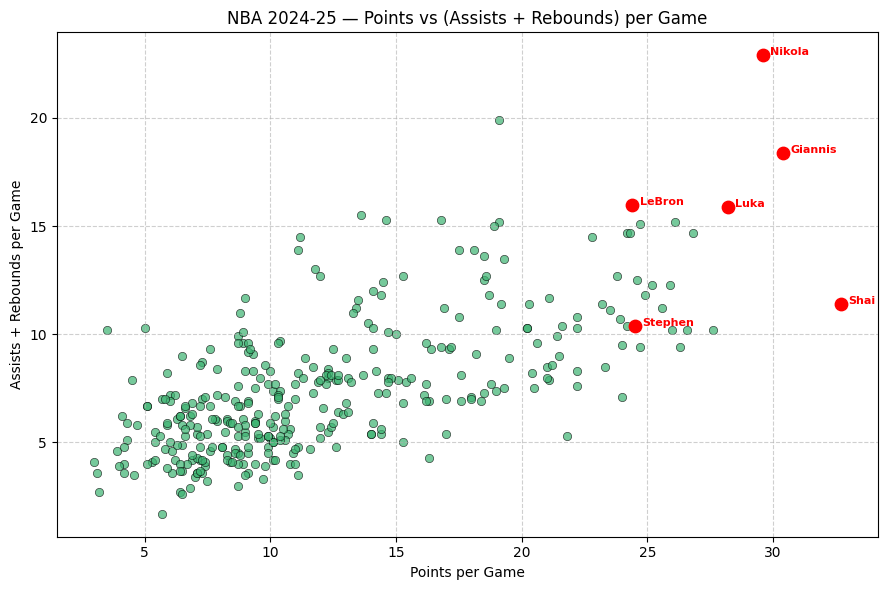

In [12]:
#Graph 10
SEASON = "2024-25"
SEASON_TYPE = "Regular Season"

data = leaguedashplayerstats.LeagueDashPlayerStats(
    season=SEASON,
    per_mode_detailed="PerGame",
    season_type_all_star=SEASON_TYPE,
    measure_type_detailed_defense="Base"
).get_data_frames()[0]

data["AST+REB"] = data["AST"] + data["REB"]

#Filter for players with enough minutes and games 
data = data[data["GP"] > 10]
data = data[data["MIN"] > 15]

#  Plot 
plt.figure(figsize=(9,6))
plt.scatter(data["PTS"], data["AST+REB"], alpha=0.7, color="mediumseagreen", edgecolor="black", linewidth=0.5)

plt.title(f"NBA {SEASON} — Points vs (Assists + Rebounds) per Game")
plt.xlabel("Points per Game")
plt.ylabel("Assists + Rebounds per Game")
plt.grid(True, linestyle="--", alpha=0.6)

for name in ["Nikola Jokić", "Luka Dončić", "Shai Gilgeous-Alexander", "LeBron James", "Giannis Antetokounmpo", "Stephen Curry"]:
    player = data[data["PLAYER_NAME"].str.contains(name, case=False, regex=False)]
    if not player.empty:
        x = player["PTS"].values[0]
        y = player["AST+REB"].values[0]
        plt.scatter(x, y, color="red", s=80, zorder=5)
        plt.text(x + 0.3, y, name.split()[0], color="red", fontsize=8, weight="bold")

plt.tight_layout()
plt.show()

In [ ]:
data["All_Around_Score"] = data["AST+REB"] + data["PTS"]
top10 = data.sort_values("All_Around_Score", ascending=False)[["PLAYER_NAME", "PTS", "AST", "REB", "AST+REB"]].head(10)
print(top10.to_string(index=False))

            PLAYER_NAME  PTS  AST  REB  AST+REB
           Nikola Jokić 29.6 10.2 12.7     22.9
  Giannis Antetokounmpo 30.4  6.5 11.9     18.4
Shai Gilgeous-Alexander 32.7  6.4  5.0     11.4
            Luka Dončić 28.2  7.7  8.2     15.9
           Jayson Tatum 26.8  6.0  8.7     14.7
        Cade Cunningham 26.1  9.1  6.1     15.2
           LeBron James 24.4  8.2  7.8     16.0
     Karl-Anthony Towns 24.4  3.1 12.8     15.9
          Anthony Davis 24.7  3.5 11.6     15.1
       Domantas Sabonis 19.1  6.0 13.9     19.9


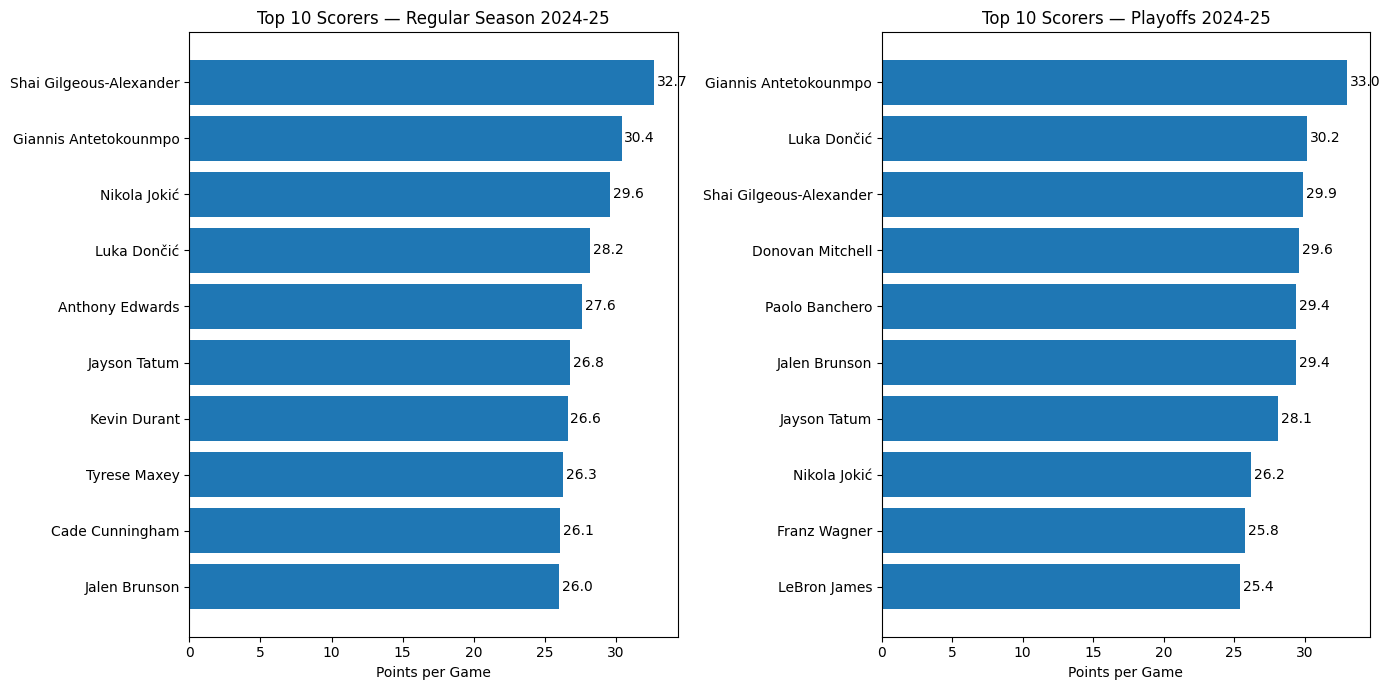

In [14]:
#Graph 11
SEASON = "2024-25"
TOP_N = 10
MIN_RS_GP = 10
MIN_PO_GP = 0

reg = leaguedashplayerstats.LeagueDashPlayerStats(
    season=SEASON,
    season_type_all_star="Regular Season",
    per_mode_detailed="PerGame",
    measure_type_detailed_defense="Base"
).get_data_frames()[0].copy()

reg = reg[reg["GP"] >= MIN_RS_GP]
reg_top = reg.sort_values("PTS", ascending=False).head(TOP_N)[["PLAYER_NAME","TEAM_ABBREVIATION","GP","PTS"]]

po = leaguedashplayerstats.LeagueDashPlayerStats(
    season=SEASON,
    season_type_all_star="Playoffs",
    per_mode_detailed="PerGame",
    measure_type_detailed_defense="Base"
).get_data_frames()[0].copy()

po = po[po["GP"] >= MIN_PO_GP]
po_top = po.sort_values("PTS", ascending=False).head(TOP_N)[["PLAYER_NAME","TEAM_ABBREVIATION","GP","PTS"]]

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=False)

#Regular Season
axes[0].barh(reg_top["PLAYER_NAME"][::-1], reg_top["PTS"][::-1])
axes[0].set_title(f"Top {TOP_N} Scorers — Regular Season {SEASON}")
axes[0].set_xlabel("Points per Game")
for i, v in enumerate(reg_top["PTS"][::-1].values):
    axes[0].text(v + 0.2, i, f"{v:.1f}", va="center")

#Playoffs
axes[1].barh(po_top["PLAYER_NAME"][::-1], po_top["PTS"][::-1])
axes[1].set_title(f"Top {TOP_N} Scorers — Playoffs {SEASON}")
axes[1].set_xlabel("Points per Game")
for i, v in enumerate(po_top["PTS"][::-1].values):
    axes[1].text(v + 0.2, i, f"{v:.1f}", va="center")

plt.tight_layout()
plt.show()